[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

#  Polynomial Fit

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 23/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0045RegressorPolynomialFit.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning


# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotRegressionData


In [5]:
# General Auxiliary Functions

def PlotPolyFit( vX: np.ndarray, vY: np.ndarray, vP: Optional[np.ndarray] = None, P: int = 1, numGridPts: int = 1001, 
                hA: Optional[plt.Axes] = None, figSize: Tuple[int, int] = FIG_SIZE_DEF, markerSize: int = MARKER_SIZE_DEF, 
                lineWidth: int = LINE_WIDTH_DEF, axisTitle: str = None ) -> None:

    if hA is None:
        hF, hA = plt.subplots(1, 2, figsize = figSize)
    else:
        hF = hA[0].get_figure()

    numSamples = len(vY)

    # Polyfit
    vW    = np.polyfit(vX, vY, P)
    
    # MSE
    vHatY = np.polyval(vW, vX)
    MSE   = (np.linalg.norm(vY - vHatY) ** 2) / numSamples
    
    # Plot
    xx  = np.linspace(np.floor(np.min(vX)), np.ceil(np.max(vX)), numGridPts)
    yy  = np.polyval(vW, xx)

    hA[0].plot(vX, vY, '.r', ms = 10, label = '$y_i$')
    hA[0].plot(xx, yy, 'b',  lw = 2,  label = '$\hat{f}(x)$')
    hA[0].set_title (f'$P = {P}$\nMSE = {MSE}')
    hA[0].set_xlabel('$x$')
    # hA[0].axis(lAxis)
    hA[0].grid()
    hA[0].legend()
    
    hA[1].stem(vW[::-1], label = 'Estimated')
    if vP is not None:
        hA[1].stem(vP[::-1], linefmt = 'C1:', markerfmt = 'D', label = 'Ground Truth')
    numTicks = len(vW) if vP is None else max(len(vW), len(vP))
    hA[1].set_xticks(range(numTicks))
    hA[1].set_title('Coefficients')
    hA[1].set_xlabel('$w$')
    hA[1].legend()

    # return hA


## Polynomial Fit

Polynomial Fit is about optimizing the parameters of a polynomial model to explain the given data.  
There 2 main _polynomials_ in this context:

 * [Polynomial](https://en.wikipedia.org/wiki/Polynomial).
 * [Trigonometric Polynomial](https://en.wikipedia.org/wiki/Trigonometric_polynomial).

The model parameters are liner with the data which means the solution is given by a _Linear System_.  
Yet, in practice, due to noise or model incompatibility, the system can not be solved as it is.  
Then a minimization is done using different objectives, among them the most popular are:

 * Least Squares (Induced by the ${L}^{2}$ Norm).
 * Least Deviation (Induced by the ${L}^{1}$ Norm).

Using the the Least Squares model generates a Linear Least Squares problem.

* <font color='brown'>(**#**)</font> There are many other objectives in the field of regression in general and linear fit specifically.

In [7]:
# Parameters

# Data Generation
numSamples  = 30
noiseStd    = 0.3

vP = np.array([0.5, 2, 5])
polynomDeg = 2

# Data Visualization
gridNoiseStd = 0.05
numGridPts = 250


## Generate / Load Data

In the following we'll generate data according to the following model:

$$ y_{i} = f \left( x_{i} \right) + \epsilon_{i} $$

Where

$$ f \left( x \right) = \frac{1}{2} x^{2} + 2x + 5 $$


In [8]:
# The Data Generating Function

def f( vX: np.ndarray, vP: np.ndarray ) -> np.ndarray:
    # return 0.25 * (vX ** 2) + 2 * vX + 5
    return np.polyval(vP, vX)


hF = lambda vX: f(vX, vP)

In [9]:
# Generate Data

vX = np.linspace(-2, 2, numSamples, endpoint = True) + (gridNoiseStd * np.random.randn(numSamples))
vN = noiseStd * np.random.randn(numSamples)
vY = hF(vX) + vN

print(f'The features data shape: {vX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (30,)
The labels data shape: (30,)


### Plot Data

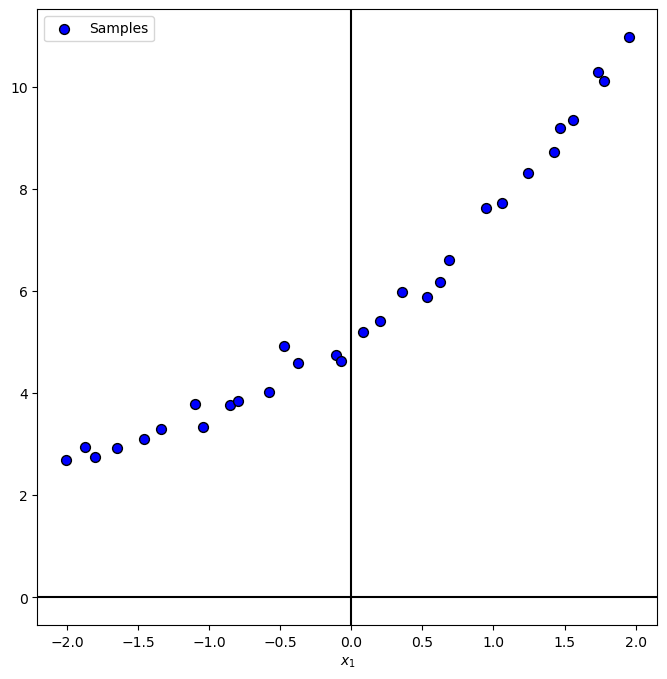

In [10]:
# Plot the Data

PlotRegressionData(vX, vY)

plt.show()


* <font color='red'>(**?**)</font> What would be the equivalent of class balance for regression? Think on the span and density of the values.

## Train Polyfit Regressor

The PolyFit optimization problem is given by:

$$ \arg \min_{\boldsymbol{w}} {\left\| \boldsymbol{y} - \boldsymbol{\Phi} \boldsymbol{w} \right|}_{2}^{2} $$

Where

$$
\boldsymbol{\Phi} = \begin{bmatrix} 1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{p} \\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{p} \\
\vdots & \vdots & \vdots &  & \vdots \\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{p}
\end{bmatrix}
$$

This is a _polyfit_ with hyper parameter $p$.

The optimal weights are calculated by linear system solvers.  
Yet it is better to use solvers optimized for this task, such as:

 * NumPy: [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).
 * SciKit Learn: [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) combined with [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

In this notebook we'll use the NumPy's implementation.

* <font color='brown'>(**#**)</font> For arbitrary $\Phi$ the above becomes a _linear regression_ problem.

In [13]:
polynomDeg

2

In [11]:
# Polynomial Fit

# The order of Polynomial p(x) = w[0] * x**deg + ... + w[deg].
# Hence we need to show it reversed:
vW = np.polyfit(vX, vY, polynomDeg)

for ii in range(polynomDeg + 1):
    print(f'The coefficient of degree {ii}: {vW[-1 - ii]:0.3f}')


The coefficient of degree 0: 5.082
The coefficient of degree 1: 2.032
The coefficient of degree 2: 0.467


### Effect of the Polynomial Degree $p$

The degree of the polynomial is basically the DoF of the model.  
Tuning it is the way (Along with Regularization) to avoid _underfit_ and _overfit_.

In [12]:
# The Polynomial Degree Parameter

hPolyFit = lambda P: PlotPolyFit(vX, vY, vP = vP, P = P)
pSlider = IntSlider(min = 0, max = 31, step = 1, value = 0, layout = Layout(width = '30%'))
interact(hPolyFit, P = pSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='P', layout=Layout(width='30%'), max=31), Output()), _dom…

* <font color='red'>(**?**)</font> What happens when the degree of the polynomial is higher than the number of samples?
* <font color='red'>(**?**)</font> What would be the optimal $\boldsymbol{w}$ in case the model matrix is given by $\boldsymbol{\Phi} = \begin{bmatrix} 5 & 2 x_{1} & \frac{1}{2} x_{1}^{2} \\
5 & 2 x_{2} & \frac{1}{2} x_{2}^{2} & \\
\vdots & \vdots & \vdots \\
5 & 2 x_{N} & \frac{1}{2} x_{N}^{2}
\end{bmatrix}$?
* <font color='brown'>(**#**)</font> The properties of the model matrix are important. As we basically after the best approximation of the data in the space its columns spans. For instance, for Polynomial Fit, we ca use better basis for polynomials.

### Sensitivity to Support

We'll show the effect of the support, given a number of sample on the estimated weights (_Coefficients_).

In [15]:
# Data Generation
vN = 20 * noiseStd * np.random.randn(numSamples)

def GenDataByRadius( vP, P, vN, valR: float = 1.0 ):

    vX = np.linspace(-valR, valR, np.size(vN), endpoint = True)
    vY = f(vX, vP) + vN
    
    PlotPolyFit(vX, vY, vP = vP, P = P)
    


In [16]:
# Interactive Visualization

hGenDataByRadius = lambda valR: GenDataByRadius(vP, polynomDeg, vN, valR)

rSlider = FloatSlider(min = 0.1, max = 50.0, step = 0.1, value = 0.1, layout = Layout(width = '30%'))
interact(hGenDataByRadius, valR = rSlider)

plt.show()

interactive(children=(FloatSlider(value=0.1, description='valR', layout=Layout(width='30%'), max=50.0, min=0.1…

In [17]:
# Samples and Coefficients MSE as a Function of Support
# Doing the above manually.

def GenDataRadius( vP, vN, valR: float = 1.0 ):

    vX = np.linspace(-valR, valR, np.size(vN), endpoint = True)
    vY = f(vX, vP) + vN

    return vX, vY

vR = np.linspace(0.1, 50, 20)


for valR in vR:
    vX, vY = GenDataRadius(vP, 0.5 * vN, valR)
    vW = np.polyfit(vX, vY, polynomDeg)

    vYPred = np.polyval(vW, vX)
    valMSESamples = np.mean(np.square(vYPred - vY))
    valMSECoeff = np.mean(np.square(vW - vP))
    print(f'The Support Radius  : {valR}.')
    print(f'The Samples MSE     : {valMSESamples}.')
    print(f'The Coefficients MSE: {valMSECoeff}.')
    print(f'The Estimated Coef  : {vW}')

The Support Radius  : 0.1.
The Samples MSE     : 8.515811666921199.
The Coefficients MSE: 15437.102809687623.
The Estimated Coef  : [215.69605007   0.6031023    5.13092767]
The Support Radius  : 2.7263157894736842.
The Samples MSE     : 8.515811666921197.
The Coefficients MSE: 0.03453016283032978.
The Estimated Coef  : [0.78952227 1.94876244 5.13092767]
The Support Radius  : 5.352631578947368.
The Samples MSE     : 8.515811666921199.
The Coefficients MSE: 0.007821562980785608.
The Estimated Coef  : [0.57511032 1.9739026  5.13092767]
The Support Radius  : 7.978947368421052.
The Samples MSE     : 8.515811666921197.
The Coefficients MSE: 0.006197046393521294.
The Estimated Coef  : [0.53380205 1.98249271 5.13092767]
The Support Radius  : 10.605263157894736.
The Samples MSE     : 8.5158116669212.
The Coefficients MSE: 0.0058938784857100685.
The Estimated Coef  : [0.51913337 1.98682826 5.13092767]
The Support Radius  : 13.23157894736842.
The Samples MSE     : 8.515811666921206.
The Coefficie